In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

col_names = pd.read_csv('../data/dataset.csv', nrows=0).columns
dtype_map = {'class' : np.int16, 'bankruptcy_after_years' : np.int16}
dtype_map.update({col: np.float64 for col in col_names if col not in dtype_map})

df = pd.read_csv('../data/dataset.csv', dtype=dtype_map)
df = df.drop([df.columns[0], df.columns[1], df.columns[2], 'year'], axis=1)
df.drop_duplicates(keep=False, inplace=True)
df.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy_after_years
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,0


The following variables are mapped to **int16** data type:
- a) **class** - binary output variable that is suitable for 2-class classification;
- b) **bankruptcy_after_years** - discrete output variable with 5 possible values that is suitable for multiclass classification, range [0, 5], where 0 indicates firm was ot bakrupted, 1..5 - firm bakrupted after 1..5 years

In [3]:
df['class'].value_counts()

0    40534
1     2075
Name: class, dtype: int64

In [2]:
df['bankruptcy_after_years'].value_counts()

0    40534
2      511
3      491
1      406
4      396
5      271
Name: bankruptcy_after_years, dtype: int64

In [4]:
df.shape

(42609, 66)

In [5]:
percent_missing = df.isnull().sum() / df.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
Attr37,Attr37,43.868666
Attr21,Attr21,13.654392
Attr27,Attr27,6.421179
Attr60,Attr60,4.984862
Attr45,Attr45,4.973128
...,...,...
Attr57,Attr57,0.016428
Attr59,Attr59,0.016428
Attr55,Attr55,0.002347
class,class,0.000000


Attributes with missing values fraction > 10%:
- X37 (current assets - inventories) / long-term liabilities ~ 44%
- X21 sales (n) / sales (n-1) ~ 14%

In [7]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy_after_years,year
count,42601.000000,42601.000000,42601.000000,42477.000000,4.252000e+04,42601.000000,42601.000000,42517.000000,42600.000000,42601.000000,...,4.252900e+04,42602.000000,4.048500e+04,42509.000000,4.248600e+04,42477.000000,41813.000000,42609.000000,42609.000000,42609.000000
mean,0.046504,0.593533,0.112906,6.373712,-3.870064e+02,-0.059096,0.102496,11.406720,2.495925,0.582465,...,3.056830e+01,1.342620,4.562674e+02,17.195150,1.516469e+03,9.393010,72.504672,0.048699,0.137060,2.940928
std,2.456032,5.896904,5.489866,298.181600,6.180798e+04,7.268185,5.617762,468.427189,57.706526,13.221351,...,5.383895e+03,123.236523,3.265091e+04,558.182979,1.405514e+05,125.325358,2386.499058,0.215240,0.670925,1.282577
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,0.000000,1.000000
25%,0.003347,0.270980,0.021584,1.049400,-4.915000e+01,0.000000,0.005704,0.426940,1.019200,0.293790,...,8.759300e-01,0.000000,5.550300e+00,4.522900,4.201025e+01,3.101600,2.192700,0.000000,0.000000,2.000000
50%,0.049660,0.473050,0.197180,1.569600,-8.087900e-01,0.000000,0.059570,1.064200,1.202150,0.504630,...,9.511900e-01,0.005979,9.808000e+00,6.657400,7.119650e+01,5.096000,4.328300,0.000000,0.000000,3.000000
75%,0.129870,0.690110,0.403960,2.783600,5.083125e+01,0.086128,0.151270,2.589200,2.077850,0.707240,...,9.927200e-01,0.236988,2.032500e+01,10.451000,1.169600e+02,8.622800,9.894800,0.000000,0.000000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000,5.000000


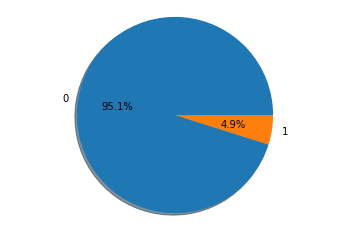

In [6]:
import sys
sys.path.append("..")
from analysis_scripts.classes_distribution import draw_pie_chart

draw_pie_chart(df, 'class')

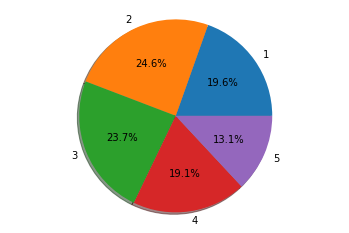

In [7]:
draw_pie_chart(df[df['bankruptcy_after_years'] > 0], 'bankruptcy_after_years')

4,9% of reports are bankrupted firms, where the majority of them were bankrupted after first 2 yeats, and the minority - after 5 years.

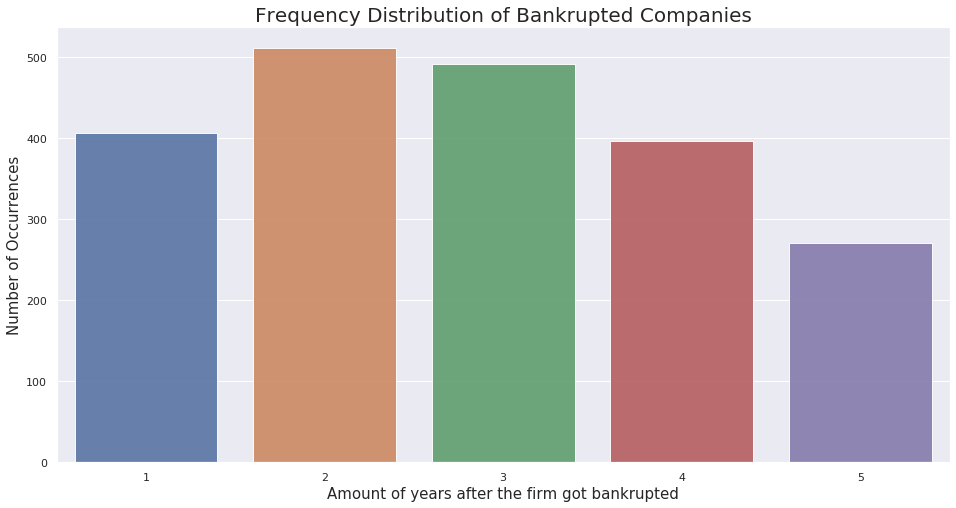

In [13]:
from analysis_scripts.classes_distribution import plot_bankruptcy_classes_distribution

plot_bankruptcy_classes_distribution(df)

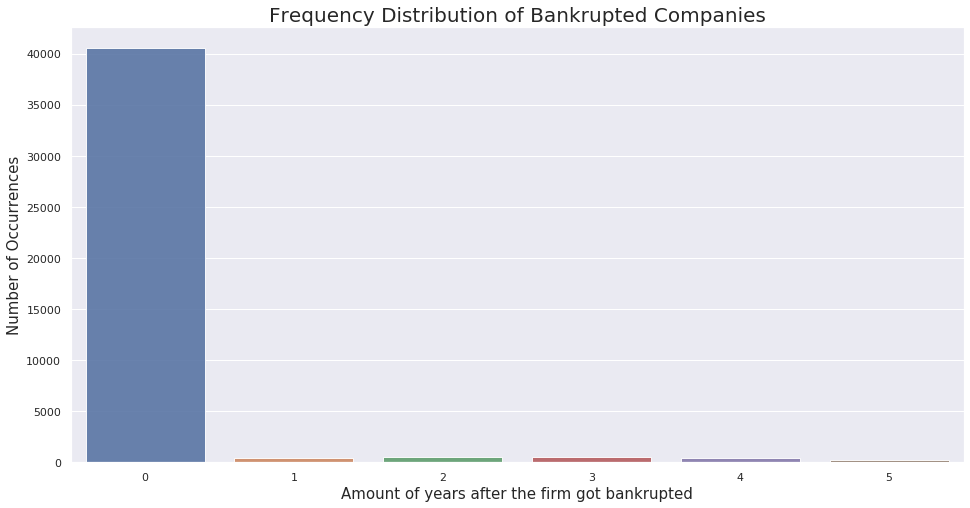

In [14]:
from analysis_scripts.classes_distribution import plot_all_classes_distribution

plot_all_classes_distribution(df)

The Anderson-Darling test evaluates whether the sample from the population follows a particular distribution. If the test statistic is higher than a critical value, the null hypothesis is rejected at the corresponding significance level (i.e there is evidence to suggest that the population doesn’t follow that particular distribution).

In [15]:
import scipy.stats

scipy.stats.anderson(df['class'], dist='norm')

AndersonResult(statistic=15423.279869728576, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [16]:
scipy.stats.anderson(df['bankruptcy_after_years'], dist='norm')

AndersonResult(statistic=14841.419699613223, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

According to the outputs of binary and 5-class output variable values arrays, the null hypothesis is rejected at all significance levels here as the test statistic is higher than all the critical values. Thus classes distribution doesn't follow normal distribution.

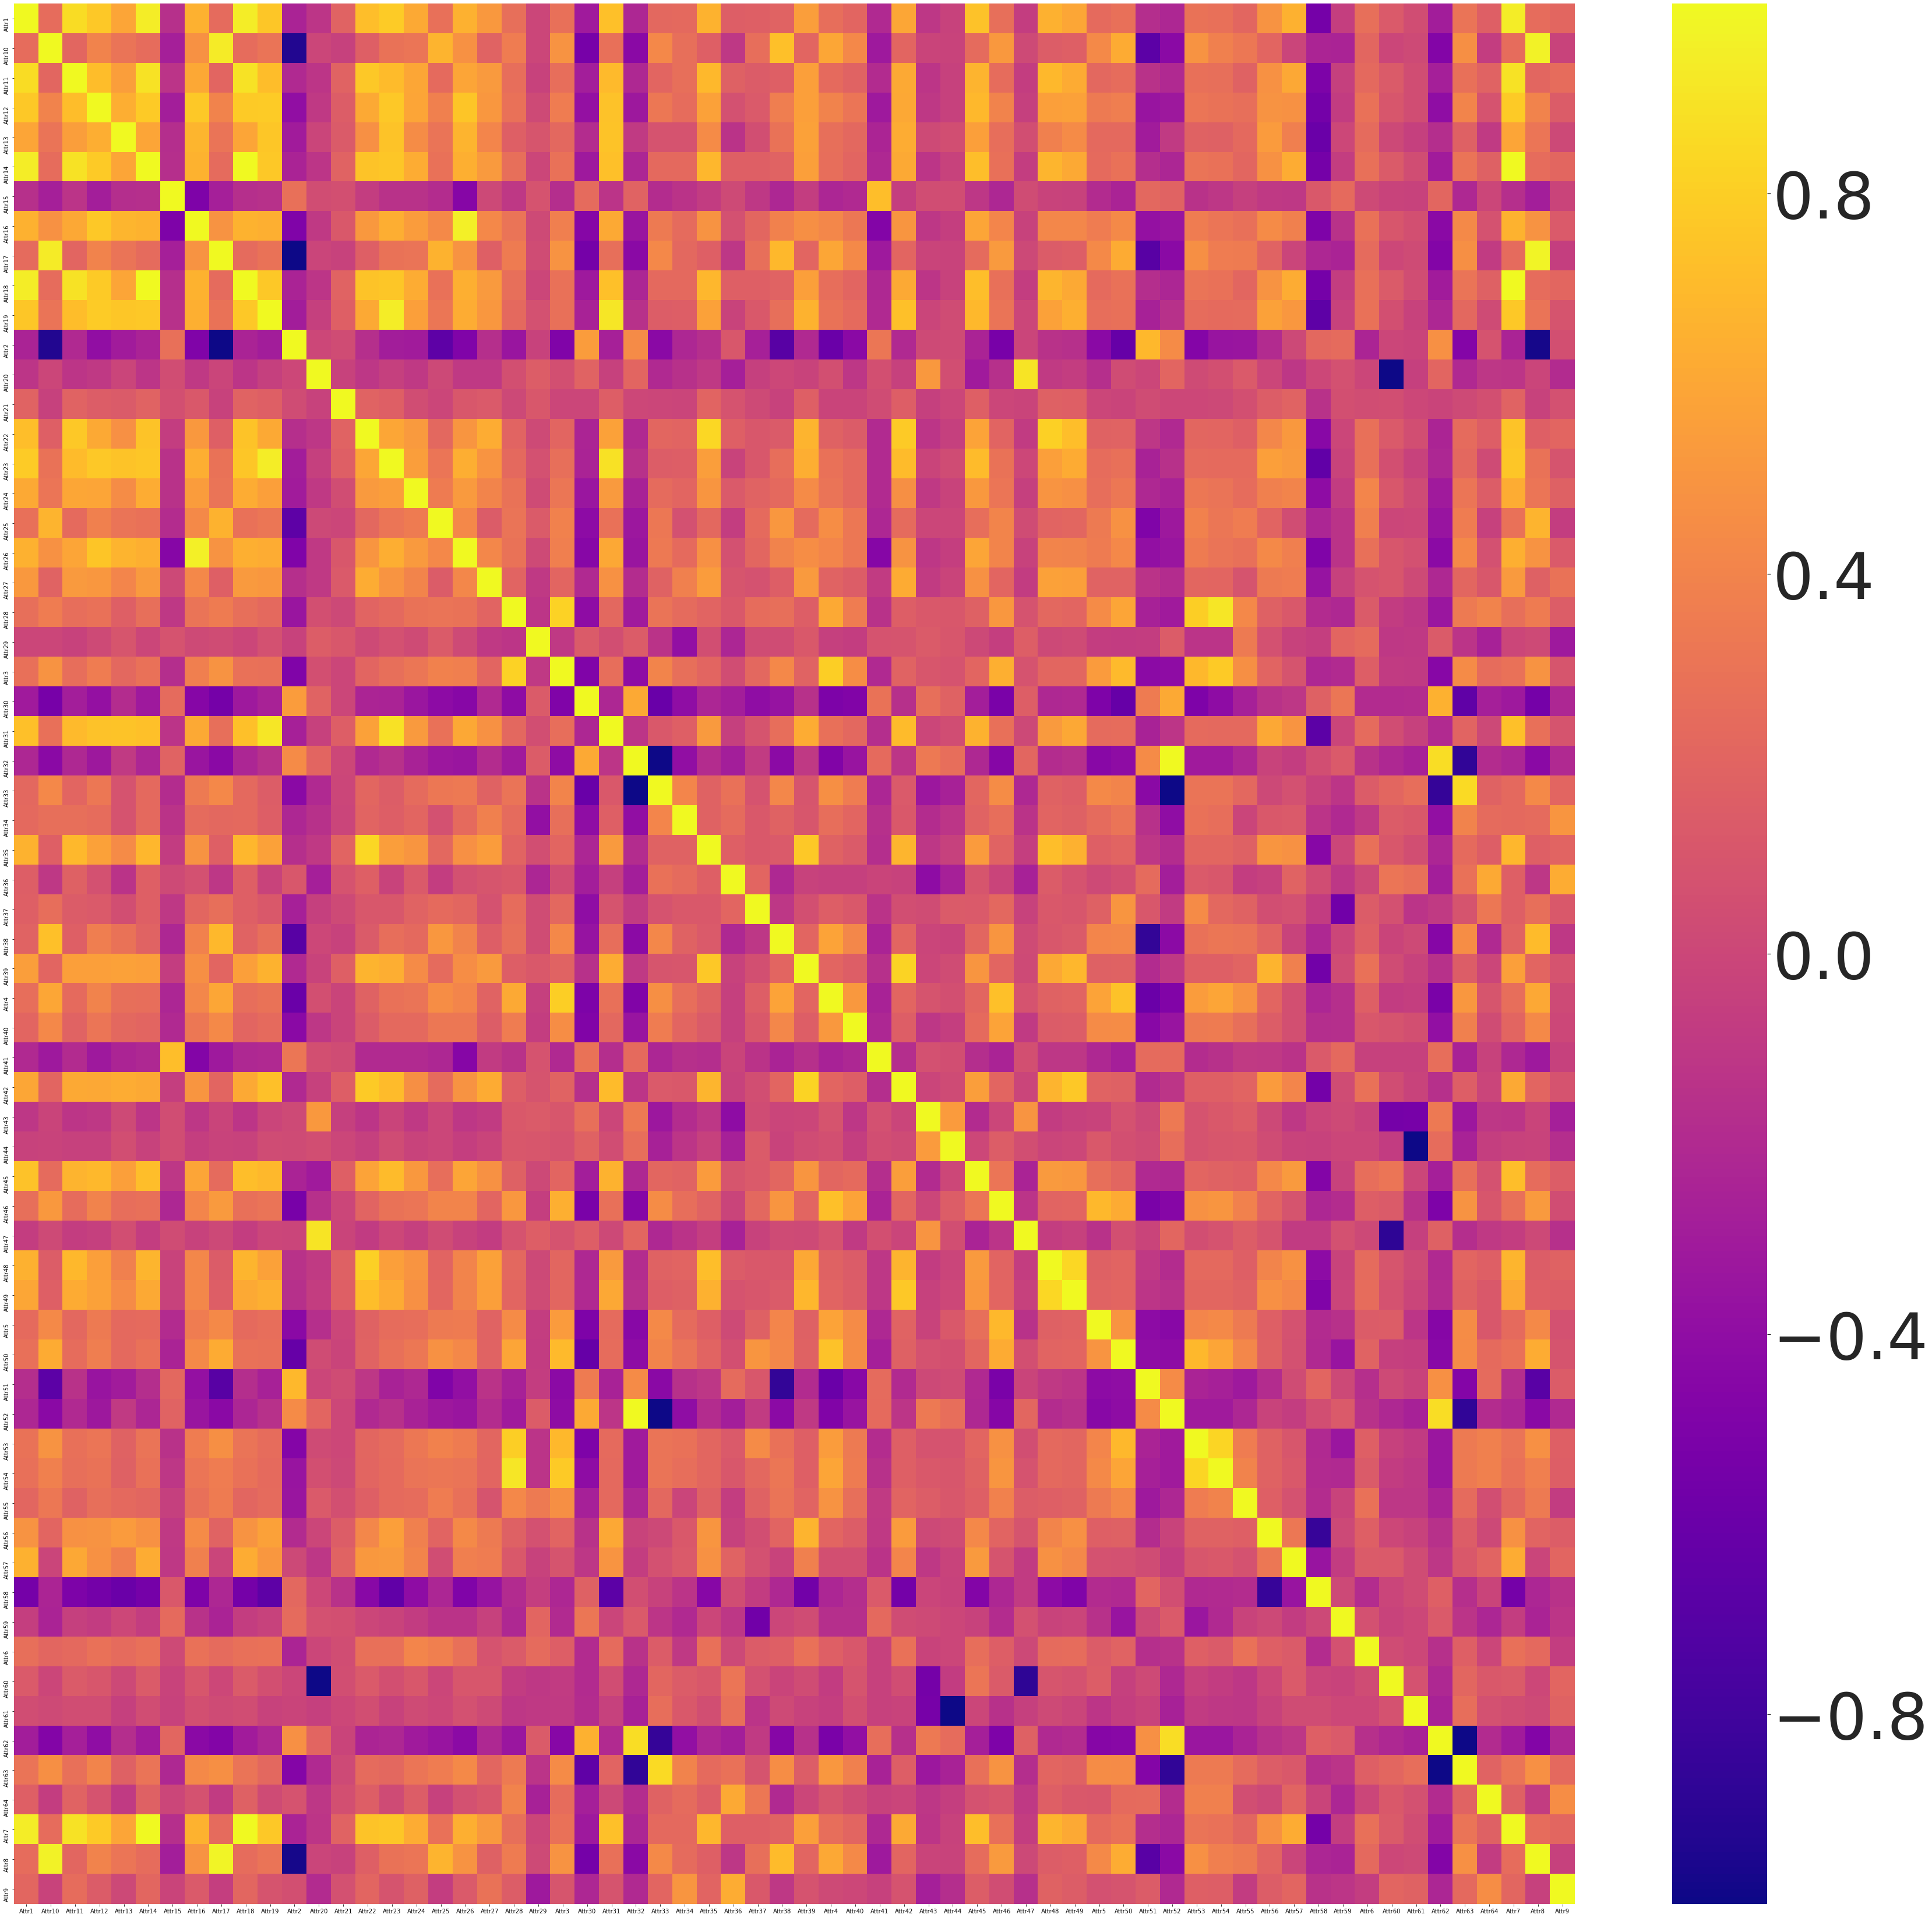

In [15]:
from analysis_scripts.correlation import plot_correlation

plot_correlation(df[df.columns.difference(['class', 'bankruptcy_after_years'])], 'kendall')

According to correlation plot, there is a lot of features with too high correlation and some features with strongly negative correlation values.

In [18]:
import itertools

# Return dataframe with pairs of attriutes and corresponding Kendall's tau value
# excluding pairs of 2 same attributes:

def corrank(matrix):        
    return pd.DataFrame([[(i,j),matrix.loc[i,j]] for i,j in list(itertools.combinations(matrix, 2))], columns=['pairs','corr'])

Below is the sorted list of attributes pairs and their correlation based on Kendall's tau value.

In [19]:
corr_matrix = df[df.columns.difference(['class', 'bankruptcy_after_years'])].corr(method="kendall")
corr_matrix = corrank(corr_matrix)
print(corr_matrix.sort_values(by='corr',ascending=False))

                 pairs      corr
308   (Attr14, Attr18)  0.999873
360    (Attr14, Attr7)  0.999839
582    (Attr18, Attr7)  0.999712
1296  (Attr32, Attr52)  0.994654
529    (Attr17, Attr8)  0.970556
...                ...       ...
1333  (Attr33, Attr52) -0.997497
1709  (Attr44, Attr61) -0.999105
2001  (Attr62, Attr63) -0.999240
478    (Attr17, Attr2) -0.999579
733   (Attr20, Attr60) -0.999777

[2016 rows x 2 columns]


In [20]:
print(corr_matrix[corr_matrix['corr'].between(0.8, 1, inclusive=True)].sort_values(by='corr',ascending=False)[0:10])

                 pairs      corr
308   (Attr14, Attr18)  0.999873
360    (Attr14, Attr7)  0.999839
582    (Attr18, Attr7)  0.999712
1296  (Attr32, Attr52)  0.994654
529    (Attr17, Attr8)  0.970556
123    (Attr10, Attr8)  0.963546
430   (Attr16, Attr26)  0.957647
60      (Attr1, Attr7)  0.940603
4      (Attr1, Attr14)  0.940464
8      (Attr1, Attr18)  0.940338


Pairs of features that have extremely high positive degree of association in range [0.8, 1]:
- X14 & X18
- X7 & X14
- X7 & X18
- X32 & X52
- X8 & X17
- X8 & X10
- X16 & X26
- X1 & X14
- X1 & X18

In [21]:
print(corr_matrix[corr_matrix['corr'].between(-1, -0.8, inclusive=True)].sort_values(by='corr',ascending=False)[0:10])

                 pairs      corr
1939  (Attr56, Attr58) -0.846339
1344  (Attr33, Attr62) -0.859020
1502  (Attr38, Attr51) -0.862847
1891  (Attr52, Attr63) -0.868084
1308  (Attr32, Attr63) -0.868939
1777  (Attr47, Attr60) -0.890366
72     (Attr10, Attr2) -0.934591
688     (Attr2, Attr8) -0.970564
1275  (Attr32, Attr33) -0.992153
1333  (Attr33, Attr52) -0.997497


Pairs of features that have extremely negative degree of association in range [-1, -0.8]:
- X56 & X58
- X33 & X62
- X38 & X51
- X52 & X63
- X32 & X63
- X47 & X60
- X2 & X10
- X2 & X8
- X32 & X33
- X33 & X52 

Features to keep should be in range [-0.8, 0.8] based on Kendall coefficient values:

In [16]:
from analysis_scripts.correlation import drop_lin_correlated

filtered_out_features = drop_lin_correlated(df[df.columns.difference(['class', 'bankruptcy_after_years'])], method="kendall")
filtered_out_features.columns.values

array(['Attr1', 'Attr10', 'Attr12', 'Attr13', 'Attr15', 'Attr16',
       'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr24', 'Attr25',
       'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr32', 'Attr34',
       'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr4', 'Attr40',
       'Attr41', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr5',
       'Attr50', 'Attr55', 'Attr56', 'Attr57', 'Attr59', 'Attr6',
       'Attr64', 'Attr9'], dtype=object)

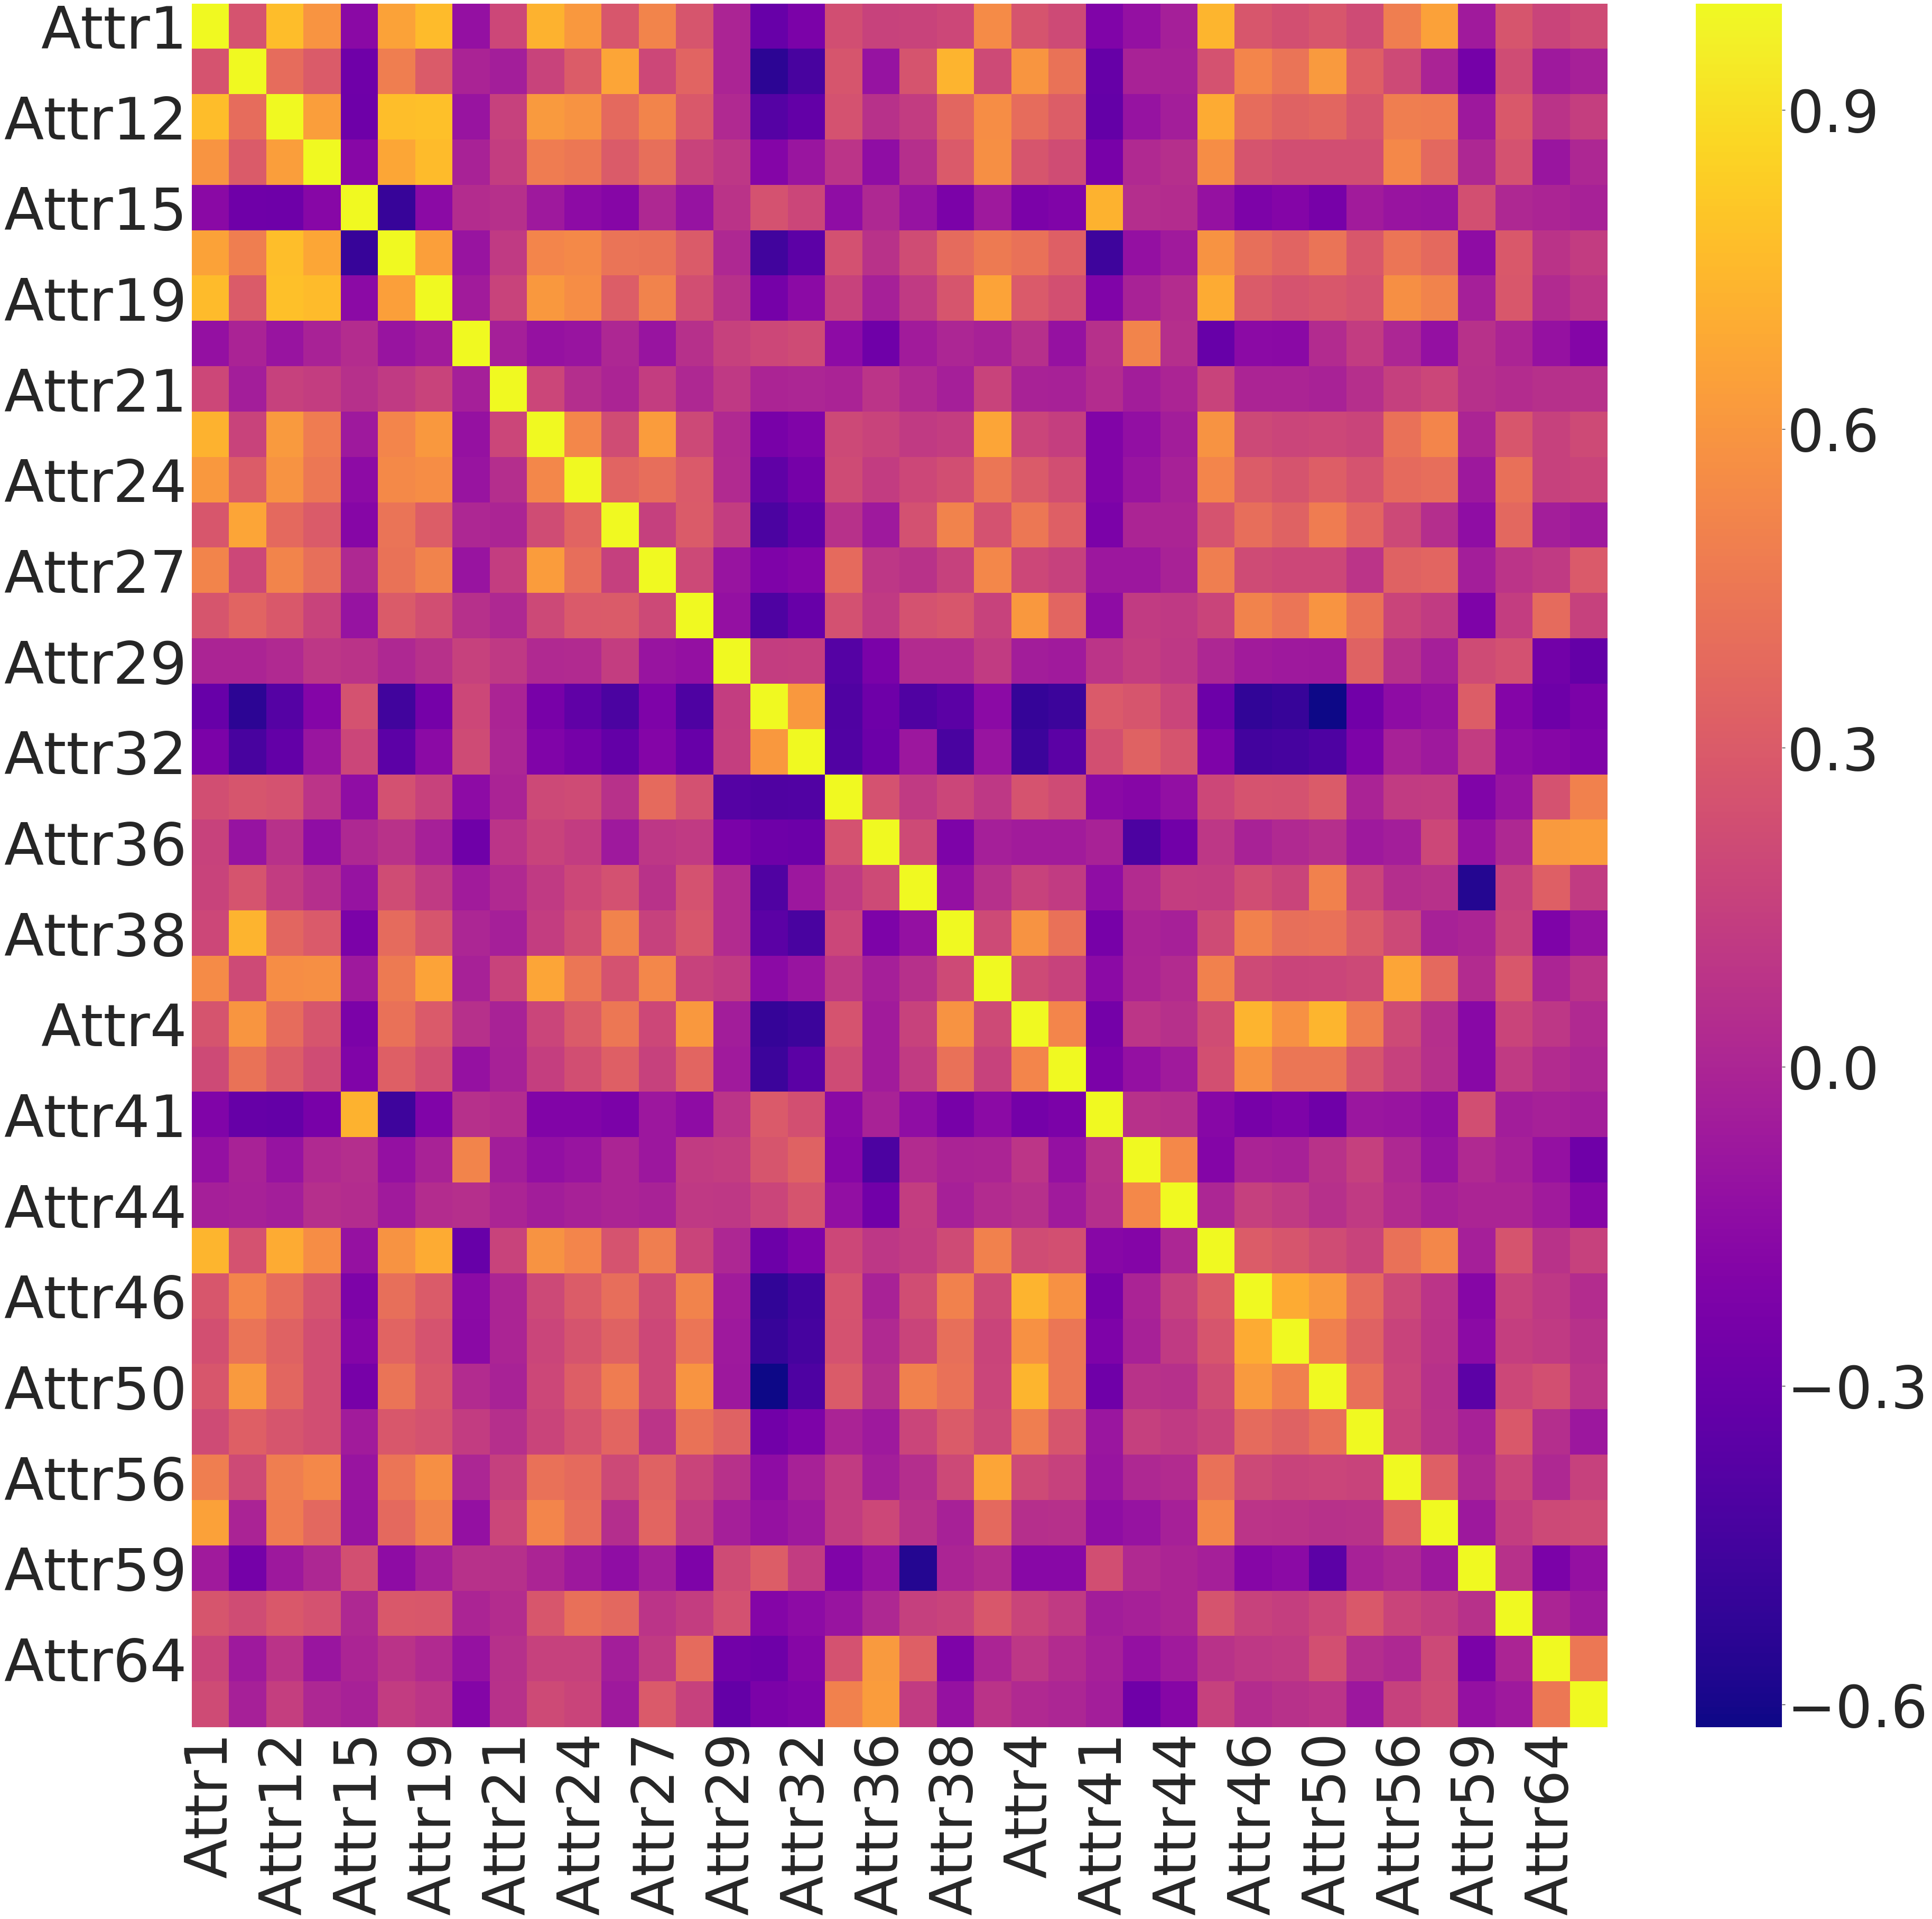

In [17]:
plot_correlation(filtered_out_features, 'kendall')

The plot above shows the correlation between features that were selected based on the Kendall's coefficient values after the following procedure:
1. select top-10 features with the highest coefficient from range (-0.8, 0);
2. select top-10 features with the lowest coefficient from range (0, 0.8).

Check whether there have left features with correlation out of range [-0.8, 0.8]:

In [23]:
corr_matrix_filtered = filtered_out_features.corr(method="kendall")
corr_matrix_filtered = corrank(corr_matrix_filtered)
print(corr_matrix_filtered.sort_values(by='corr',ascending=False))

                pairs      corr
76   (Attr12, Attr19)  0.783022
75   (Attr12, Attr16)  0.772318
1     (Attr1, Attr12)  0.766968
5     (Attr1, Attr19)  0.761044
110  (Attr13, Attr19)  0.760968
..                ...       ...
456   (Attr30, Attr4) -0.504276
462  (Attr30, Attr46) -0.517265
50   (Attr10, Attr30) -0.533638
546  (Attr37, Attr59) -0.563042
464  (Attr30, Attr50) -0.620936

[703 rows x 2 columns]


As it seen from the Kendall's tau ranking, all remained attributes have coefficient values in expected range (feature pair with itself gives Kendall's coefficient value 1, so such pairs are not taken into account).

Save features for further applying dimensionality reduction:

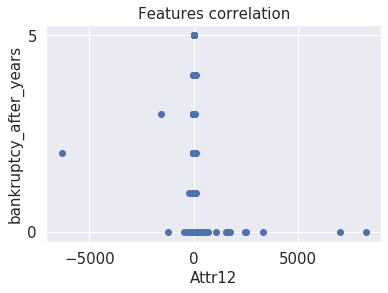

In [24]:
from analysis_scripts.correlation import plot_correlation_bivariate

plot_correlation_bivariate(df, 'Attr12', 'bankruptcy_after_years')

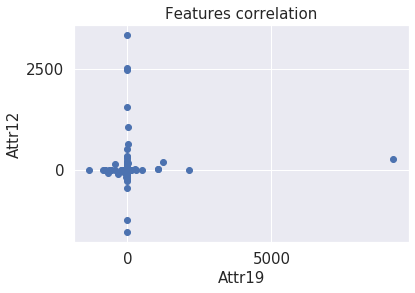

In [25]:
plot_correlation_bivariate(df, 'Attr19', 'Attr12')

In [27]:
from analysis_scripts.classes_distribution import plot_stacked_hist

# plot_stacked_hist(df, 'Attr12', 'bankruptcy_after_years')

Impute missing values before selecting top-10 features based on mutual information gain with nonparametrical model (kNN, k=3). Mutual information gain criteria is suitable for feature selection from the data having both linear and non-linear dependencies.

In [8]:
from sklearn.impute import SimpleImputer
import gc
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_data = imp.fit_transform(df)
imp_data_df = pd.DataFrame(imp_data, index=df.index, columns=df.columns)

X = imp_data_df[imp_data_df.columns.difference(['bankruptcy_after_years', 'class'])]
Y = imp_data_df['bankruptcy_after_years']

del imp_data, imp_data_df
gc.collect()

4572

In [9]:
from analysis_scripts.feature_selection import select_k_best
from sklearn.feature_selection import mutual_info_classif, f_classif

frs_mi = select_k_best(mutual_info_classif, X, Y)

  feature_names  mutual_info
6        Attr27     0.029081
4        Attr24     0.015816
9        Attr42     0.015806
5        Attr26     0.015556
8        Attr41     0.015211
3        Attr22     0.015066
0        Attr13     0.015015
2        Attr16     0.014488
1        Attr15     0.014461
7        Attr39     0.013733


As it is seen from the results, the most important feature in classifying whether the company becomes bankrupted after 0..5 years is the year attribute.
Features ranking:
1. X27 profit on operating activities / financial expenses
2. X24 gross profit (in 3 years) / total assets
3. X42 profit on operating activities / sales
4. X26 (net profit + depreciation) / total liabilities
5. X41 total liabilities / ((profit on operating activities + depreciation) * (12/365)) 
6. X22 profit on operating activities / total assets
7. X13 (gross profit + depreciation) / sales
8. X16 (gross profit + depreciation) / total liabilities 
9. X15 (total liabilities * 365) / (gross profit + depreciation)
10. X39 profit on sales / sales

In [11]:
frs_anova = select_k_best(f_classif, X, Y)

  feature_names  mutual_info
3        Attr29    32.409653
0         Attr1    28.285127
4         Attr3    14.394464
5        Attr39    14.271093
7        Attr51    14.130653
1         Attr2    13.383507
9         Attr6    12.332796
8        Attr57     9.848139
6        Attr48     8.010317
2        Attr25     6.893714


Intersection of features selected based on Kendall's tau range, top-10 ANOVA, and top-10 mutual information:

In [18]:
set(filtered_out_features) & set(frs_anova) & set(frs_mi)

{'Attr39'}

X39 (profit on sales / sales) feature found in all 3 features sets.